In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [5]:
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
data.shape

(50, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
data[data.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [12]:
type(data)

pandas.core.frame.DataFrame

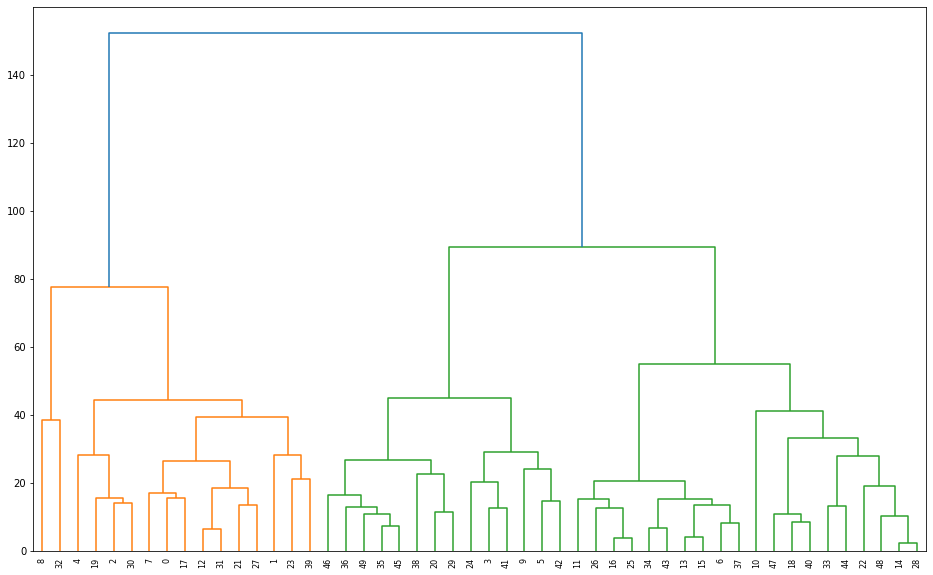

In [13]:
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))

In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [16]:
y_hc = hc.fit_predict(data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,0
4,1
5,0
6,4
7,1
8,3
9,0


In [17]:
data1 = pd.concat([data,Clusters], axis=1)
data1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,4
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [18]:
data1.sort_values("Clusters")

,Murder,Assault,UrbanPop,Rape,Clusters
24,9.0,178,70,28.2,0
46,4.0,145,73,26.2,0
45,8.5,156,63,20.7,0
42,12.7,201,80,25.5,0
41,13.2,188,59,26.9,0
38,3.4,174,87,8.3,0
36,4.9,159,67,29.3,0
35,6.6,151,68,20.0,0
29,7.4,159,89,18.8,0
20,4.4,149,85,16.3,0
